# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

# Explore Data

In [2]:
cars=pd.read_csv('/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv')

In [3]:
cars.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
cars.shape

(19237, 18)

In [5]:
cars.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [7]:
cars.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [8]:
cars.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [9]:
cars.sample(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
17589,45731795,42102,1249,HYUNDAI,H1,2017,Universal,Yes,Diesel,2.5,110000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
5016,44754850,11604,503,TOYOTA,Prius C,2012,Hatchback,No,Hybrid,1.5,0 km,4.0,Automatic,Front,04-May,Left wheel,White,12
16874,45792221,27441,1016,KIA,Optima,2017,Sedan,Yes,Petrol,2,30087 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
15462,45760086,34811,-,JEEP,Renegade,2016,Jeep,No,Petrol,2.4,53700 km,4.0,Tiptronic,4x4,04-May,Left wheel,Beige,12
17765,45803938,11563,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,114000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [10]:
cars.duplicated().sum()

313

In [11]:
cars.drop_duplicates(inplace=True)

In [12]:
cars.duplicated().sum()

0

In [13]:
cars.shape

(18924, 18)

# Data Analysis and Visualization

In [14]:
cars['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [15]:
for i in cars.columns:
    print(i,':',cars[i].nunique())

ID : 18924
Price : 2315
Levy : 559
Manufacturer : 65
Model : 1590
Prod. year : 54
Category : 11
Leather interior : 2
Fuel type : 7
Engine volume : 107
Mileage : 7687
Cylinders : 13
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16
Airbags : 17


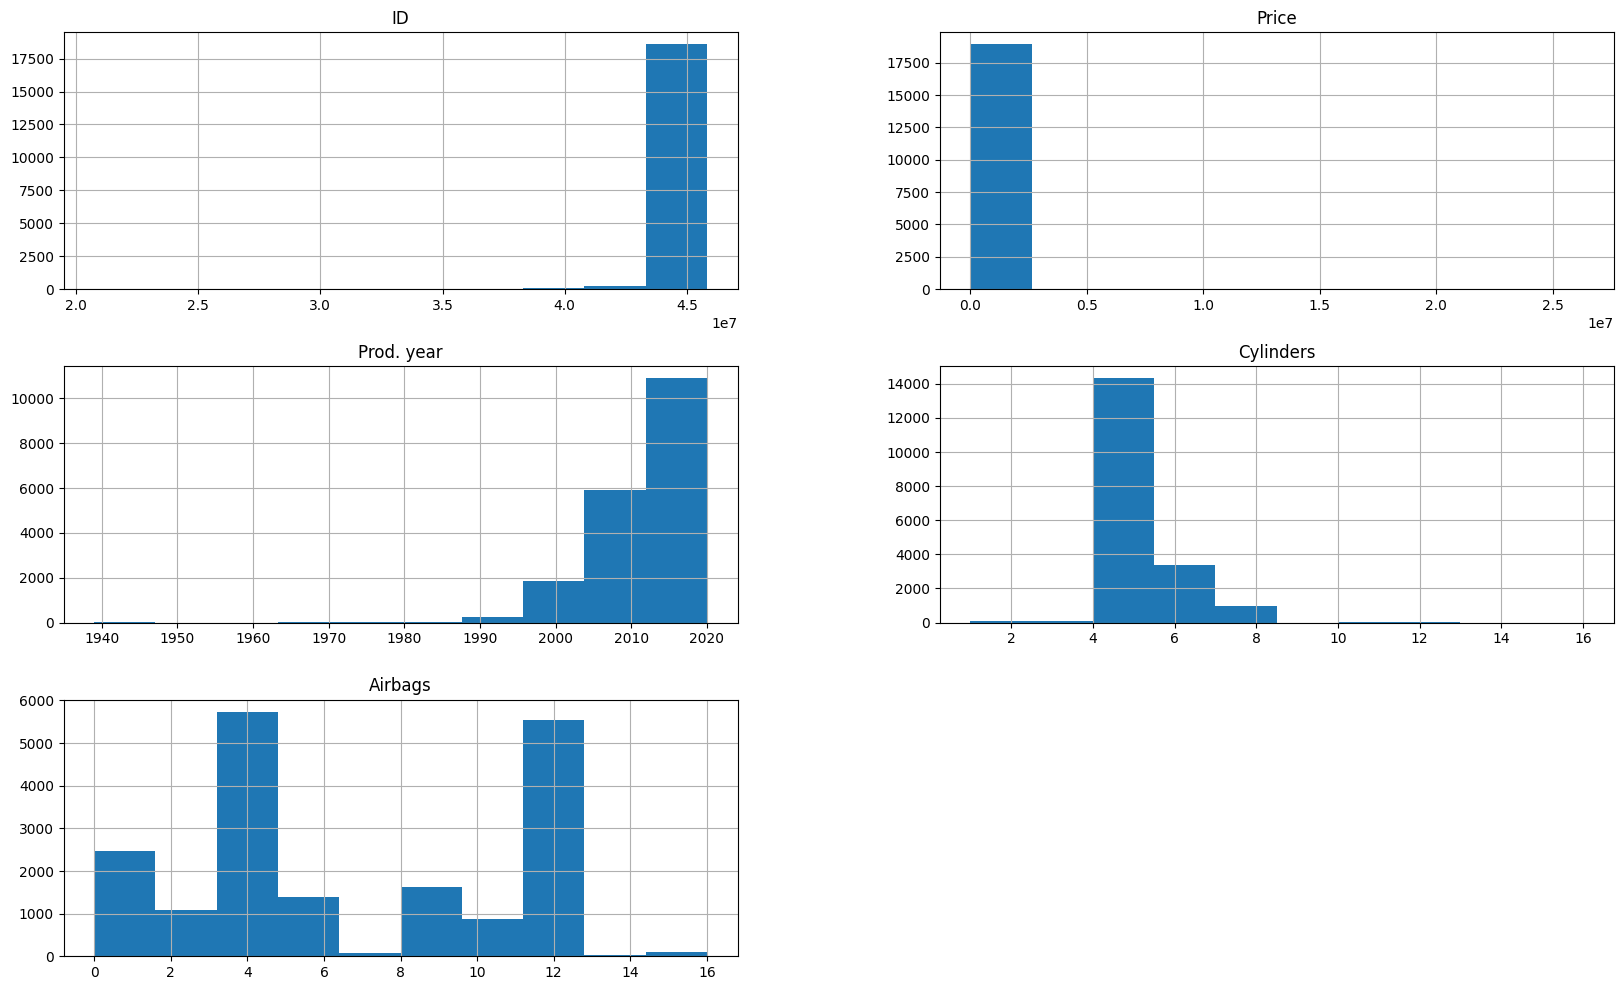

In [16]:
cars.hist(figsize=(20,12))
plt.show()

In [17]:
topcars=cars['Manufacturer'].value_counts().head(10)

In [18]:
topcars

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64

In [19]:
cars['Manufacturer'].value_counts().sort_values(ascending=True).head(10)

Manufacturer
GREATWALL       1
LANCIA          1
HAVAL           1
LAMBORGHINI     1
ASTON MARTIN    1
PONTIAC         1
SATURN          1
TESLA           1
BENTLEY         2
ZAZ             2
Name: count, dtype: int64

<Axes: xlabel='Manufacturer'>

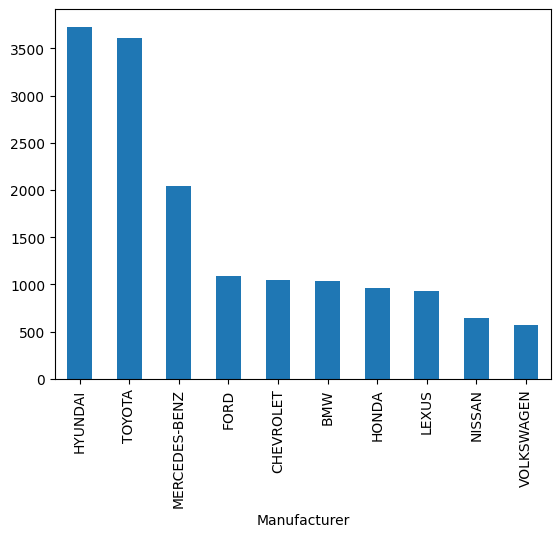

In [20]:
topcars.plot(kind='bar')

<Axes: xlabel='Manufacturer'>

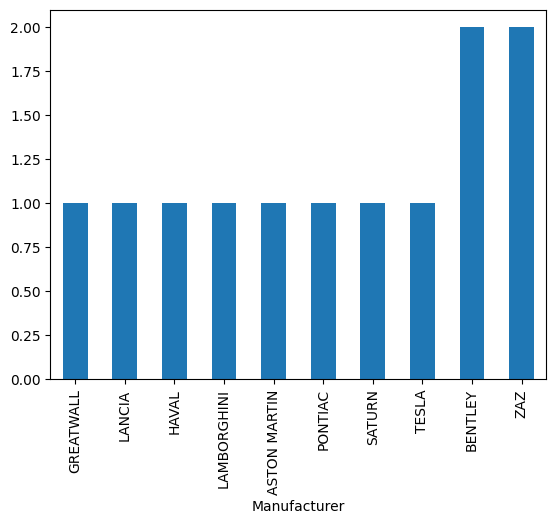

In [21]:
cars['Manufacturer'].value_counts().sort_values(ascending=True).head(10).plot(kind='bar')

In [22]:
toppricemean=[cars[cars['Manufacturer']==i]['Price'].mean() for i in list (topcars.index)]

In [23]:
toppricemean

[22306.00080450523,
 14302.447864669994,
 18590.331375428294,
 15411.85018382353,
 14894.873925501433,
 20609.468146718147,
 14162.073958333332,
 20052.594390507013,
 9835.84031007752,
 11471.77408056042]

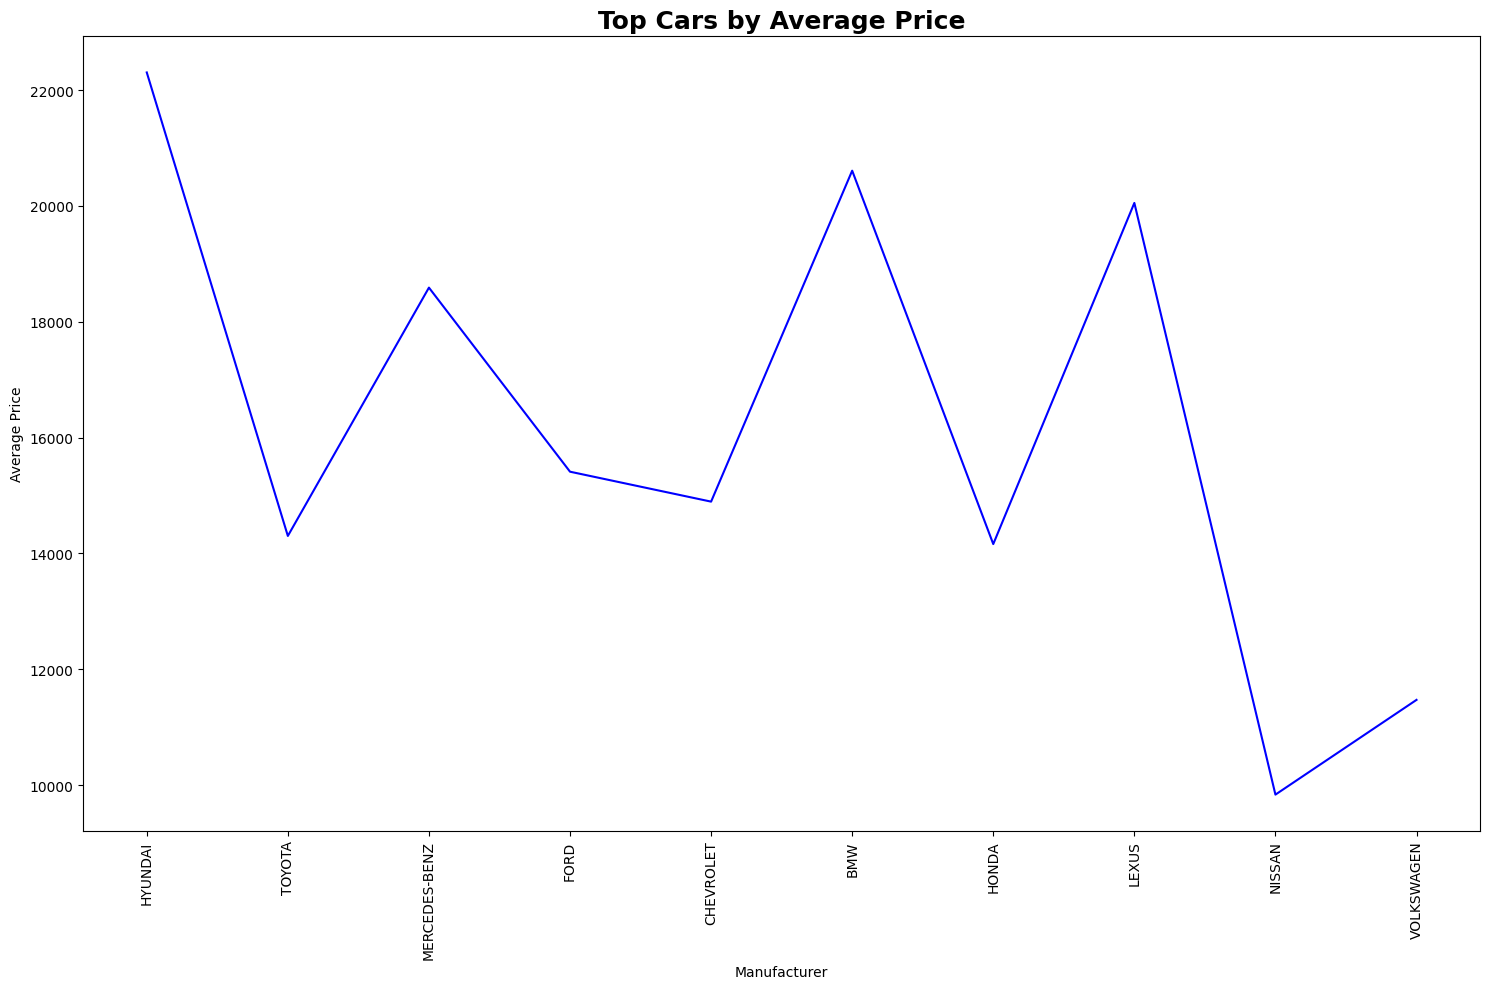

In [24]:
plt.figure(figsize=(15, 10))
plt.plot(topcars.index, toppricemean, color='blue')  
plt.title('Top Cars by Average Price', loc='center', fontweight='bold', fontsize=18)
plt.ylabel('Average Price')
plt.xlabel('Manufacturer')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In [25]:
ob=cars.select_dtypes(include='object')

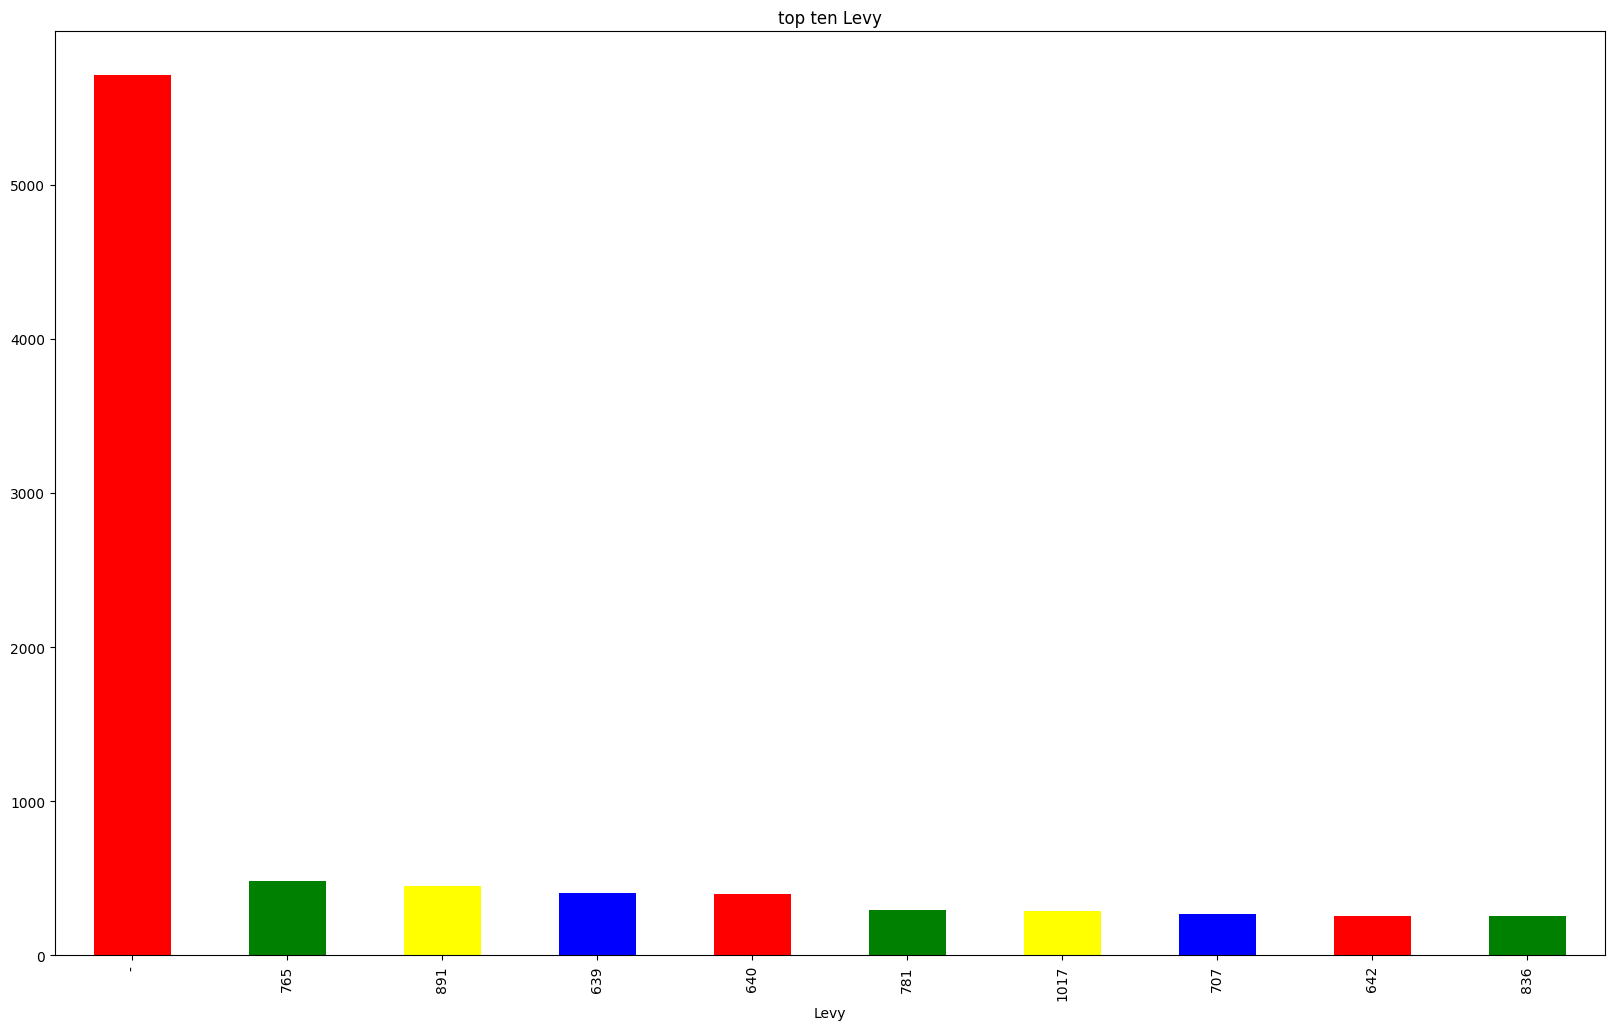

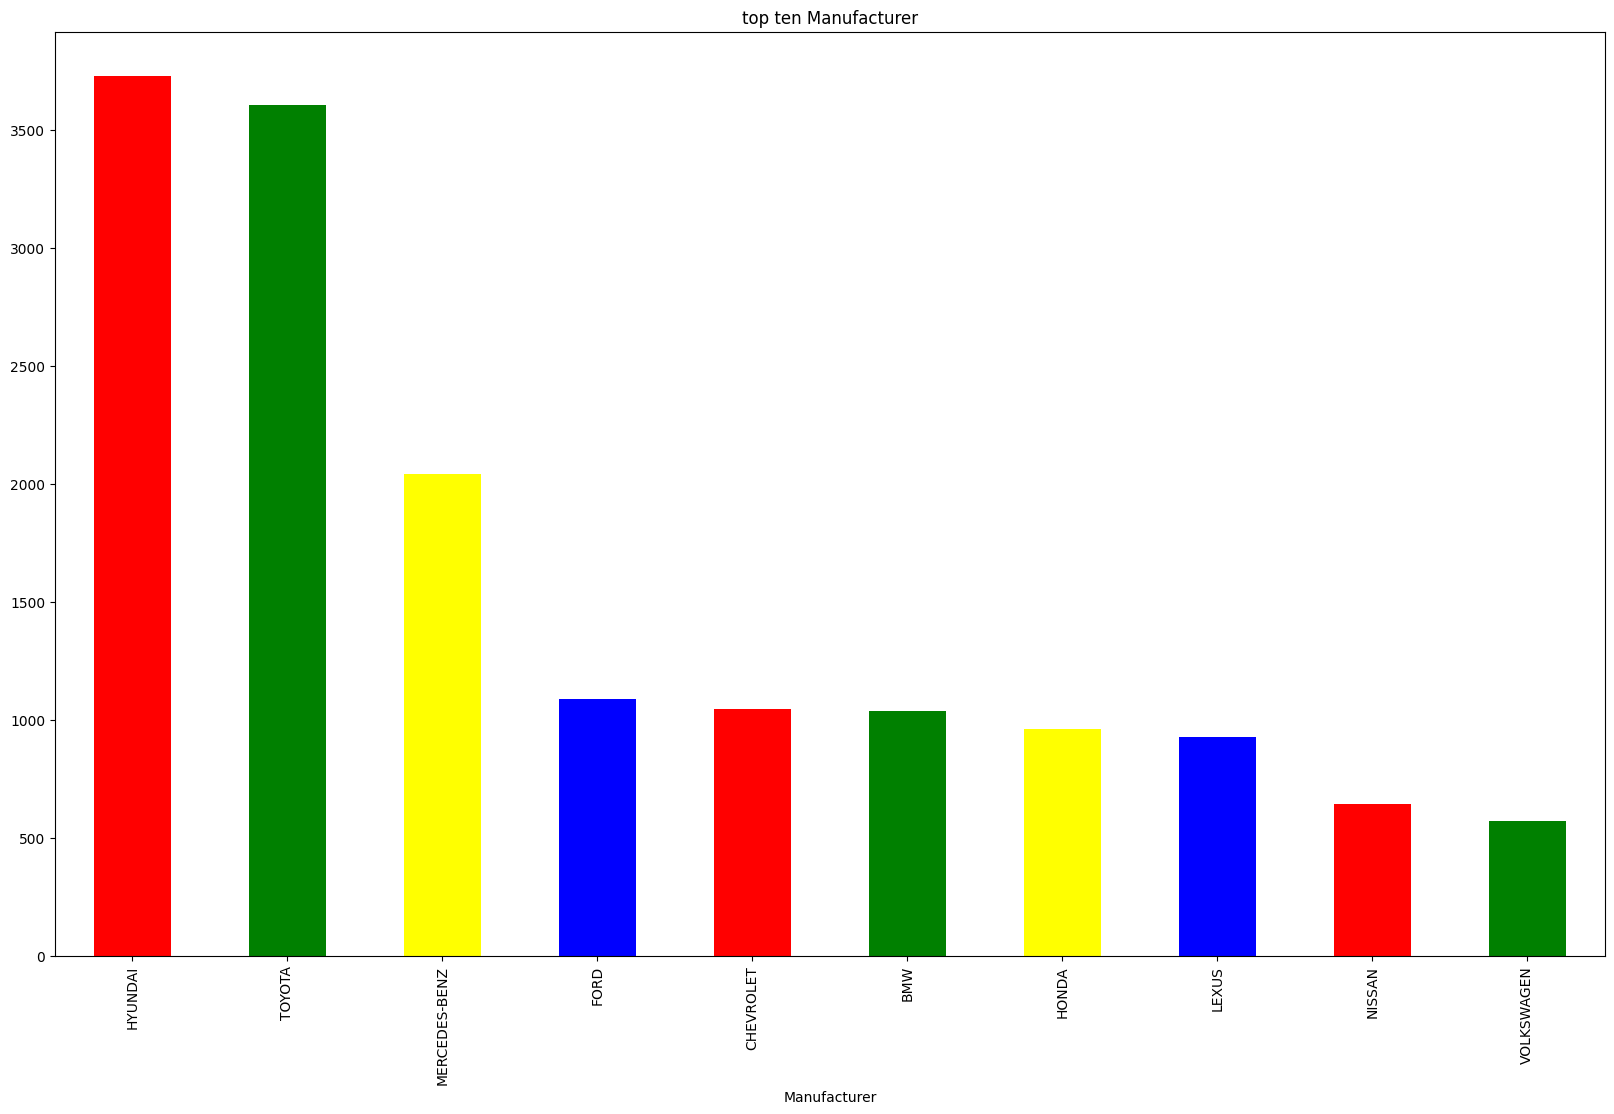

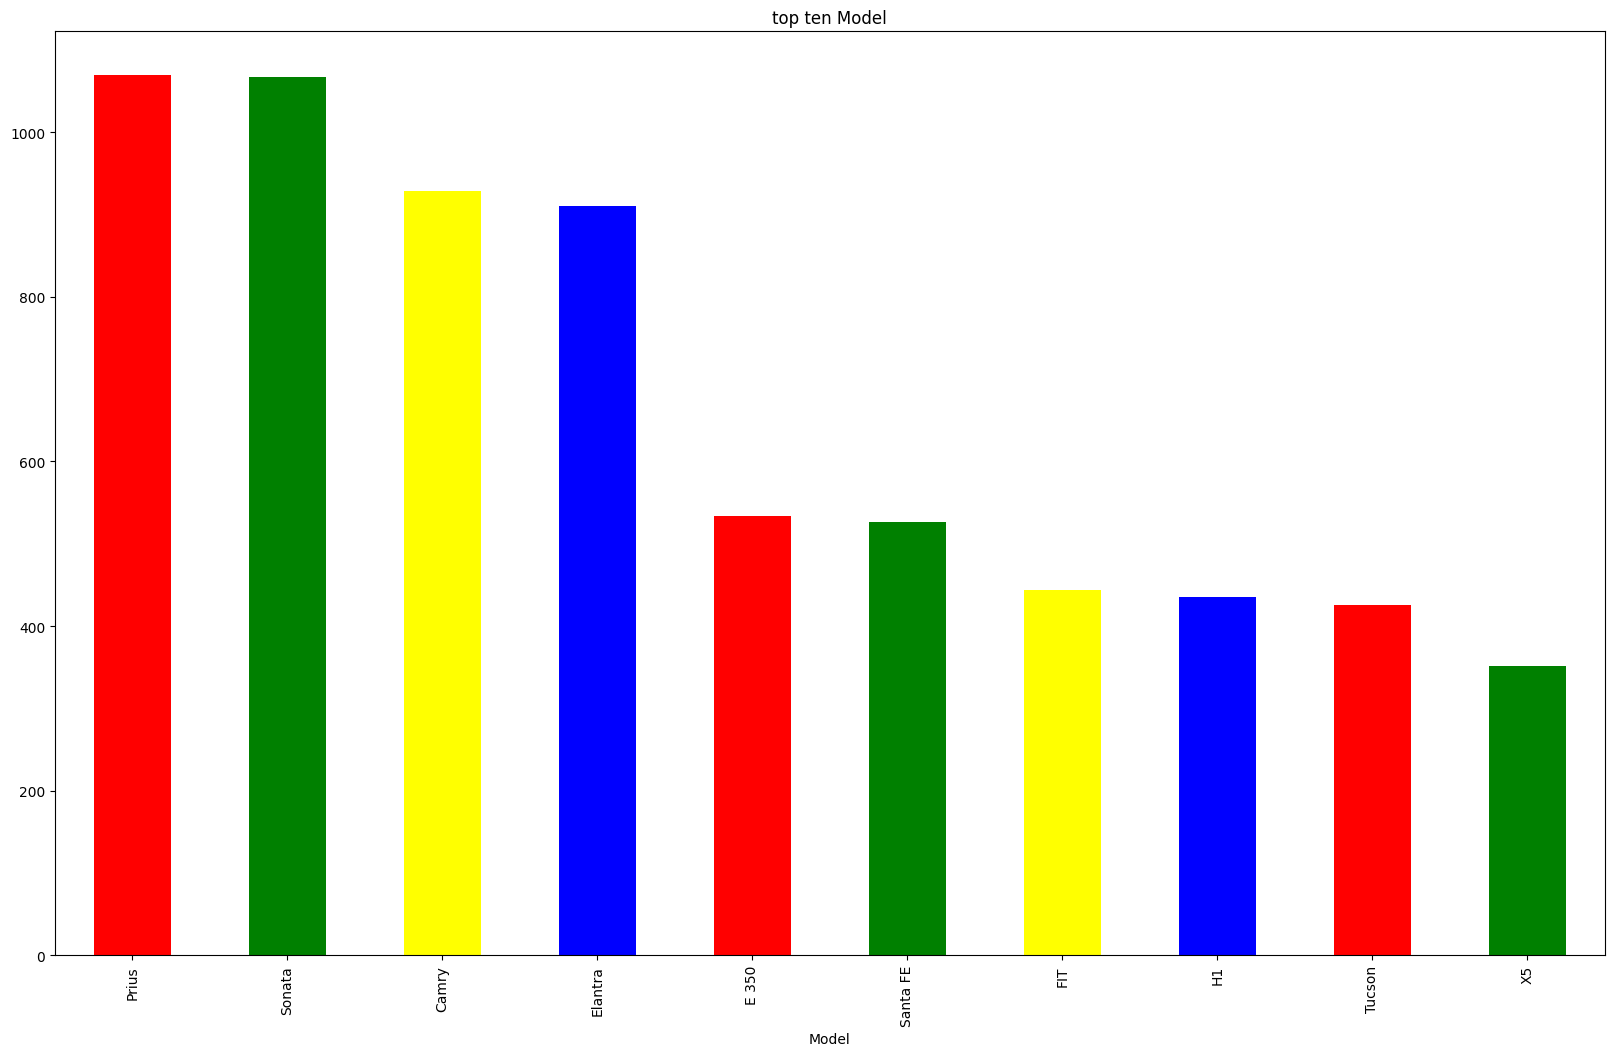

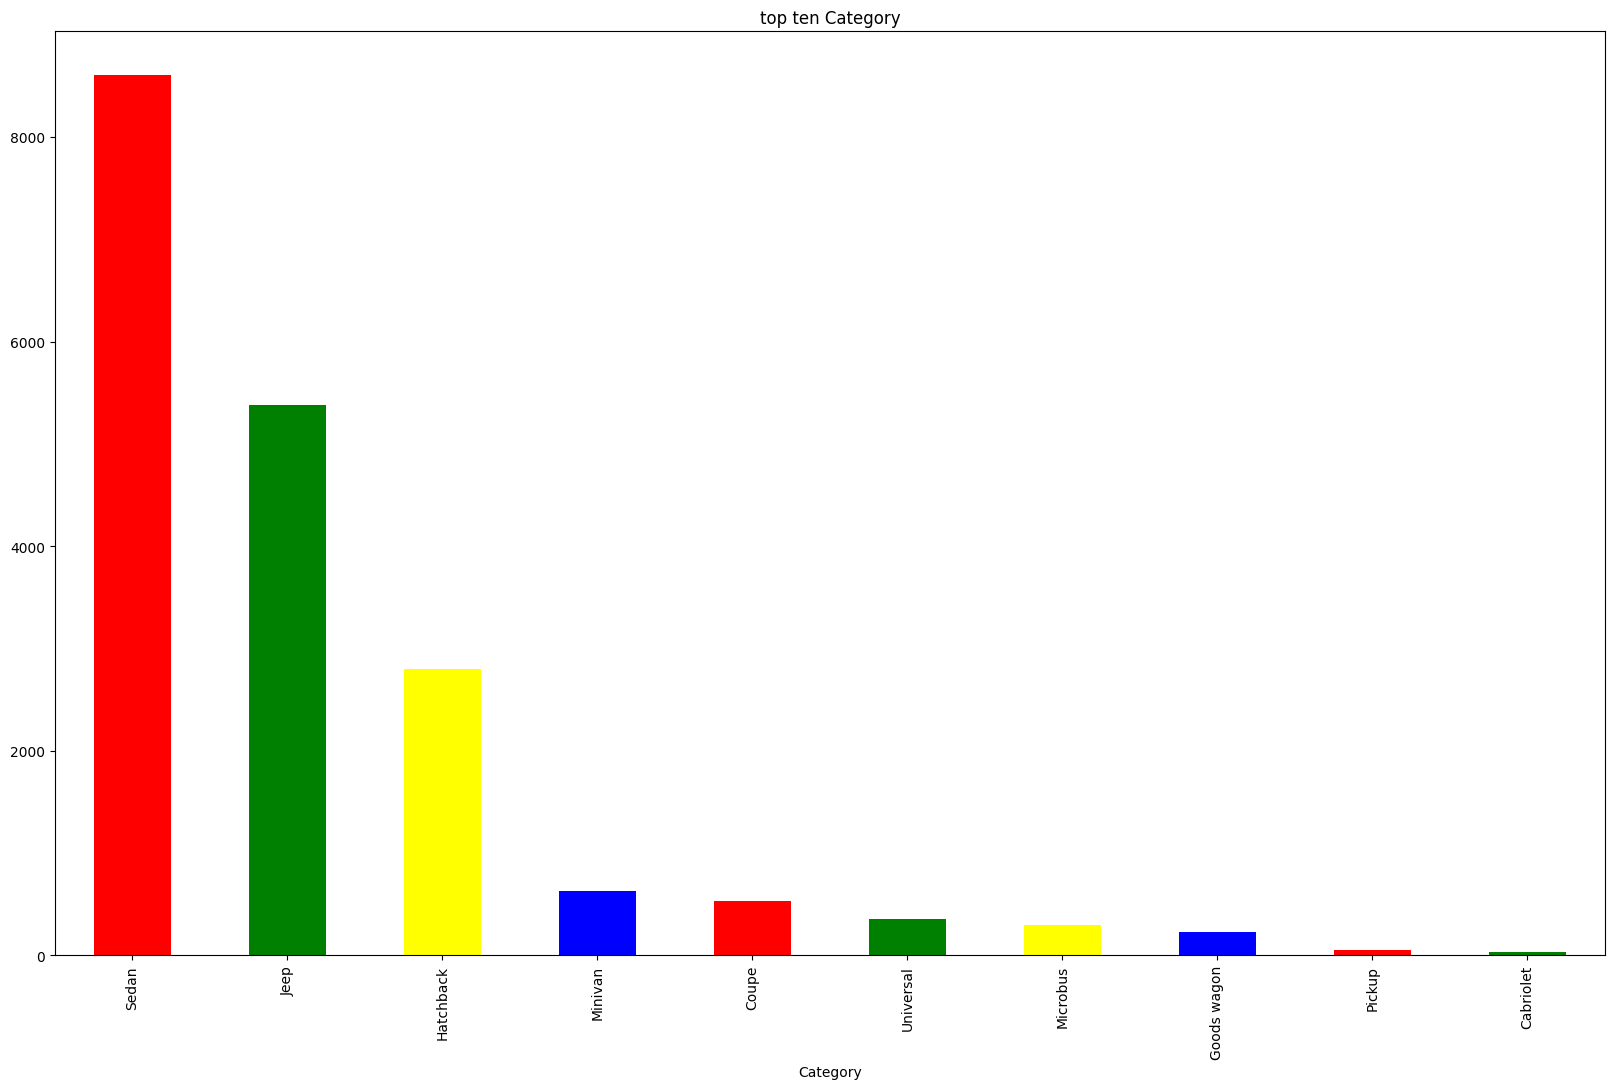

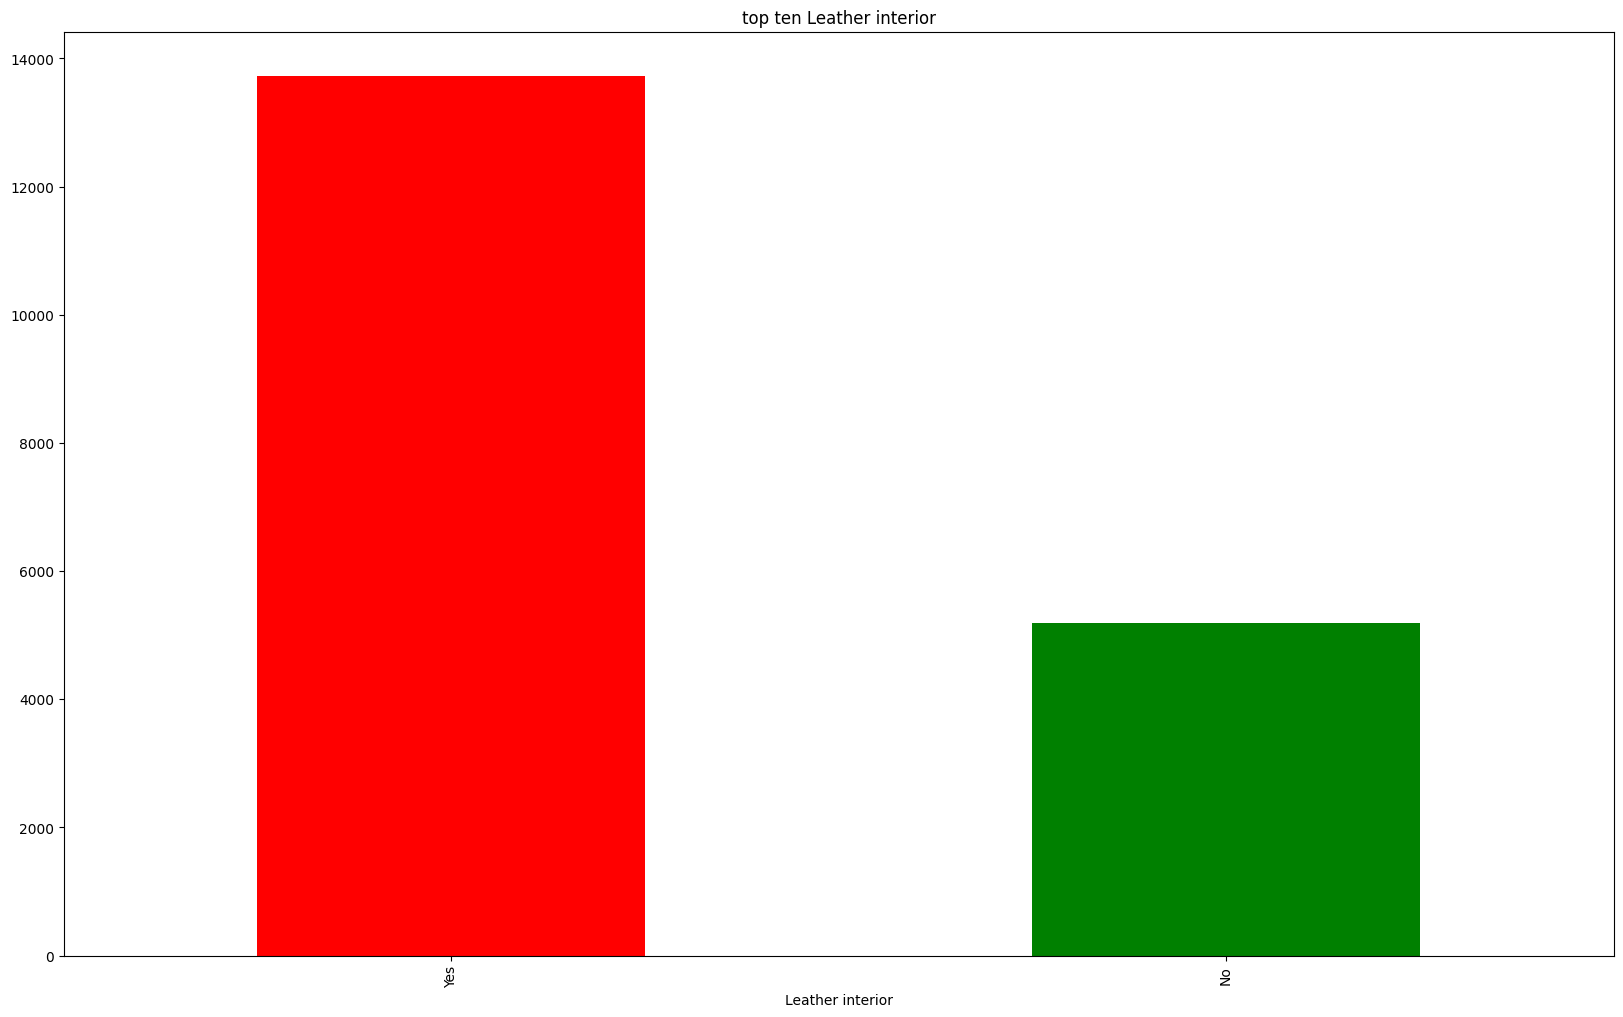

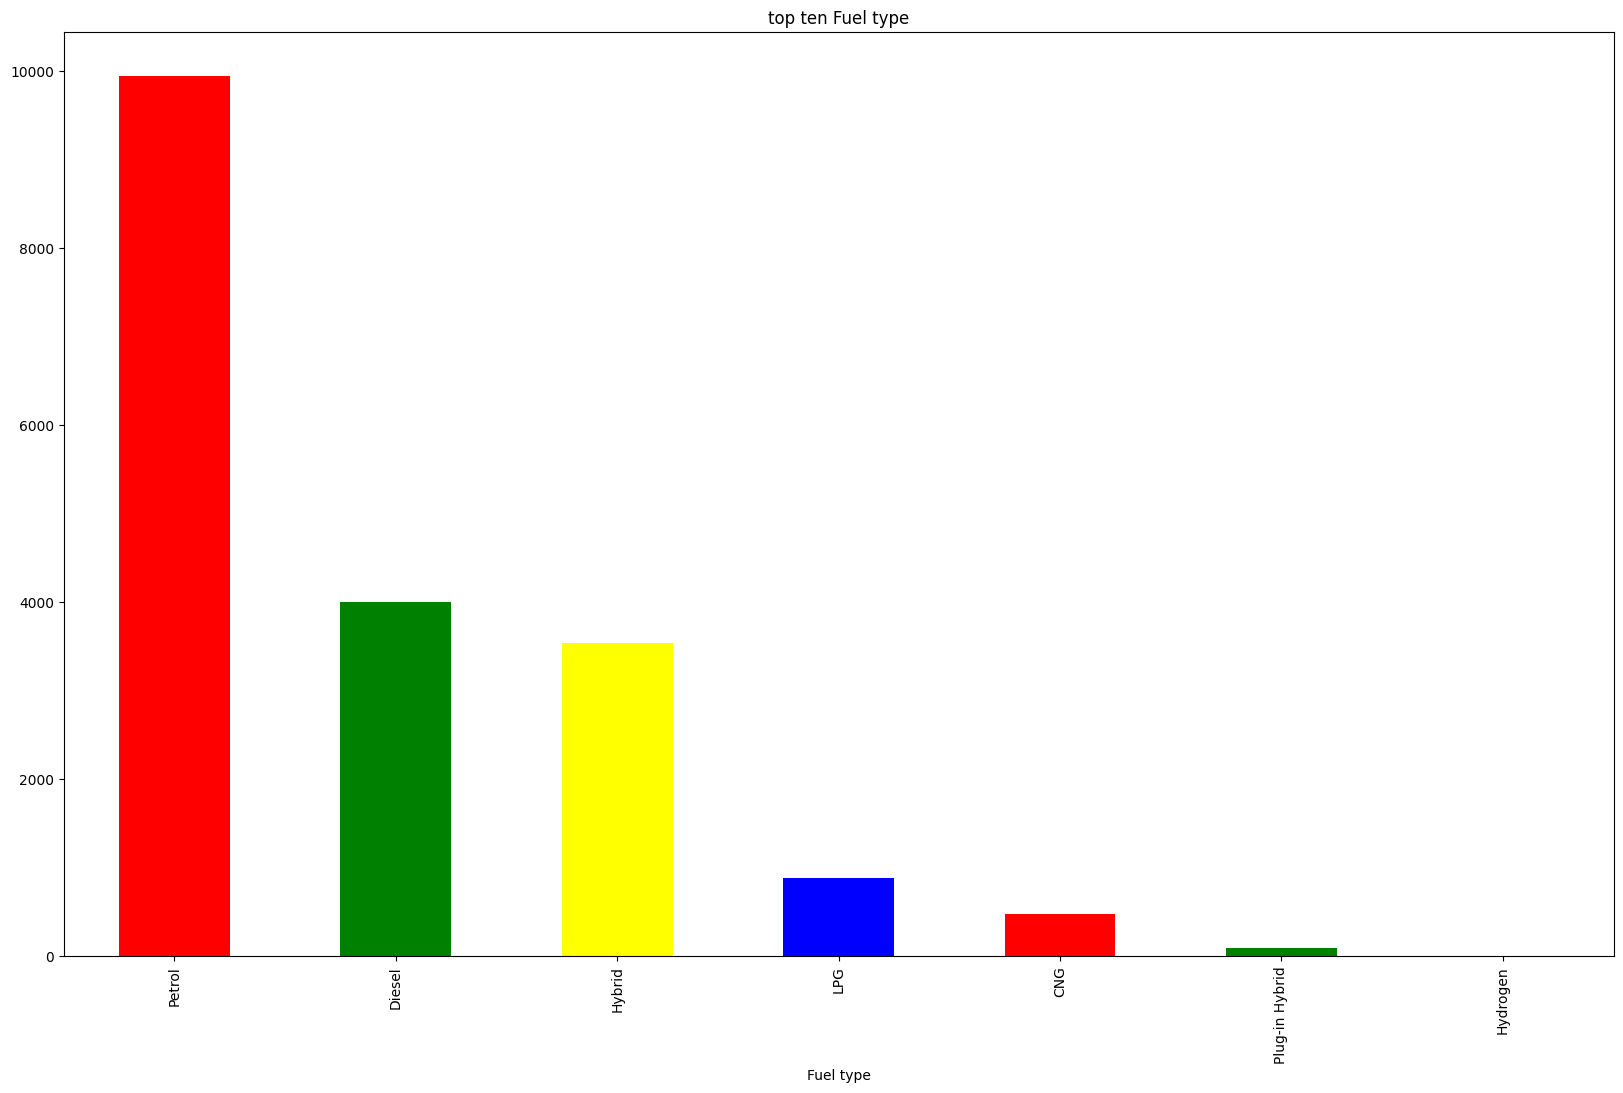

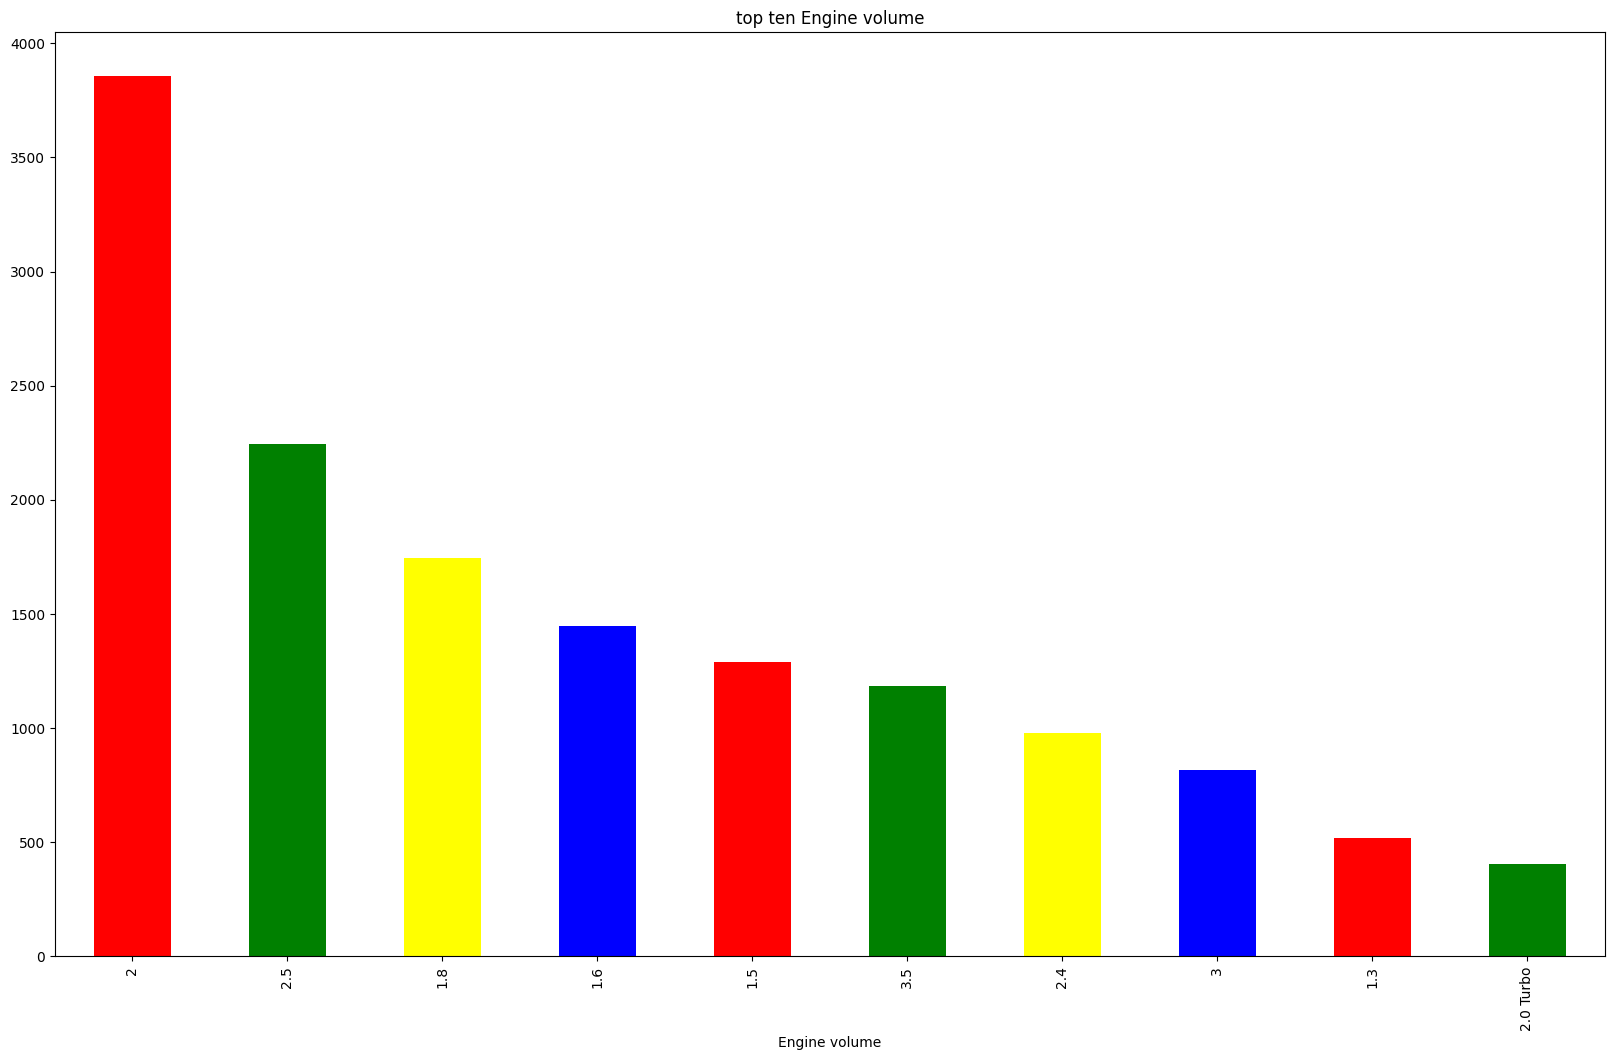

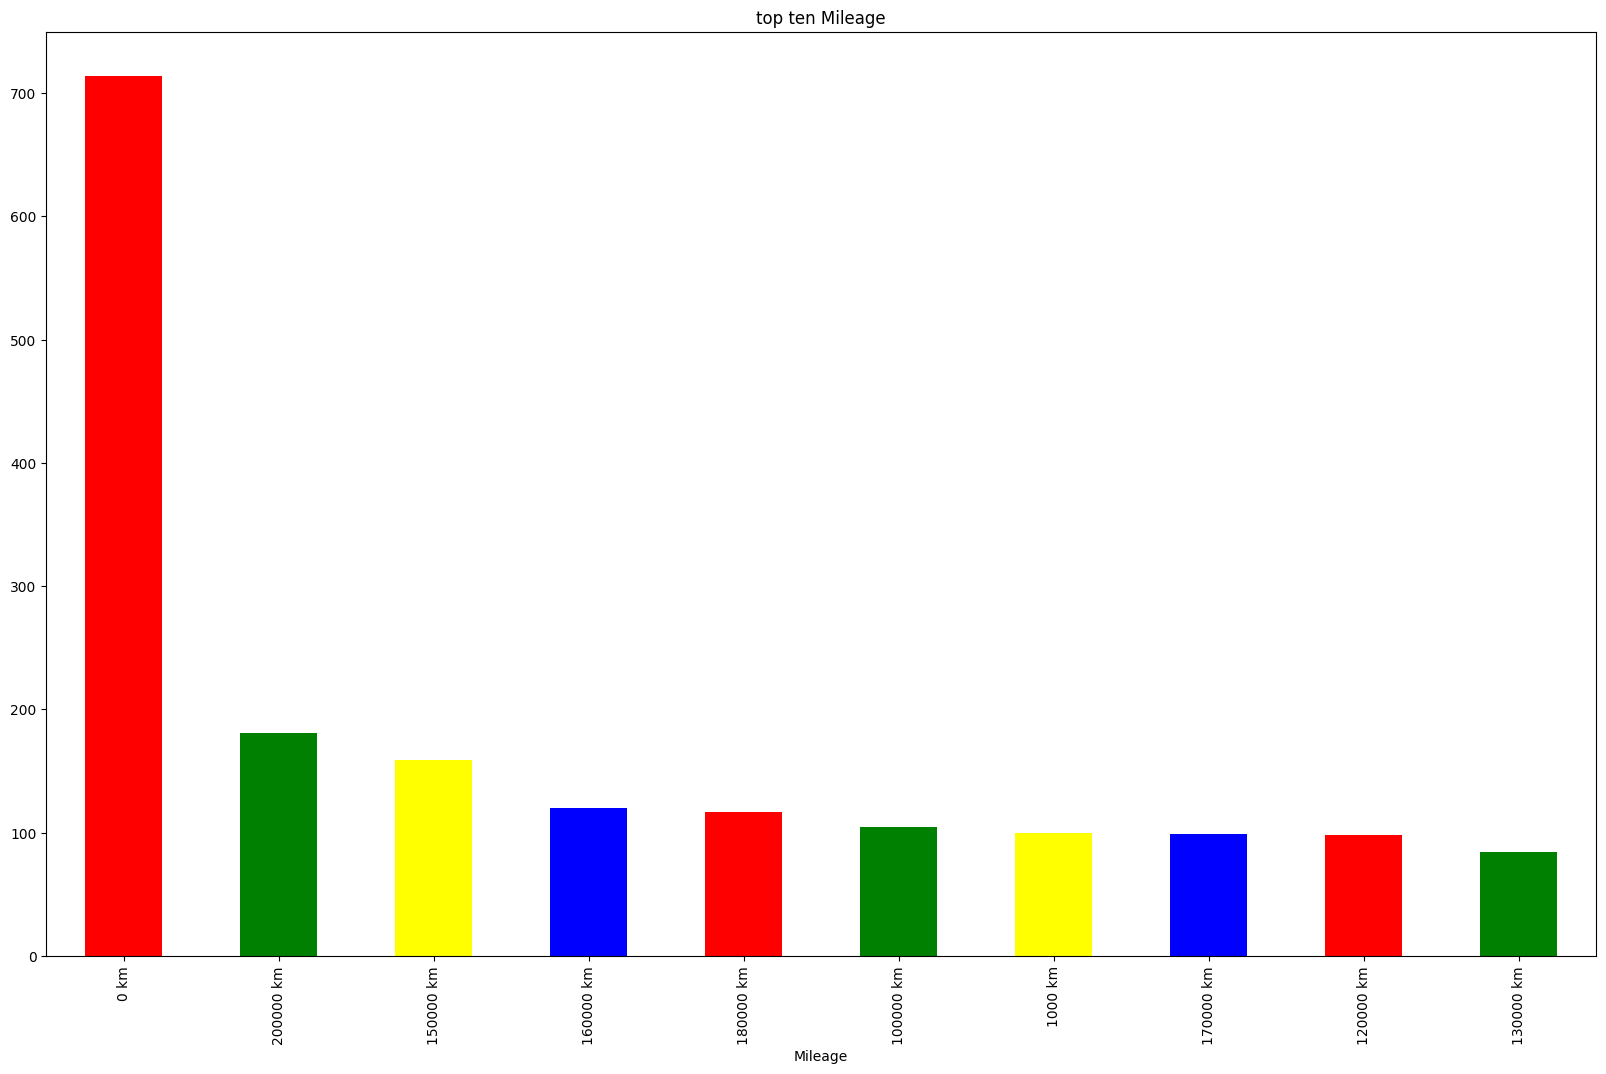

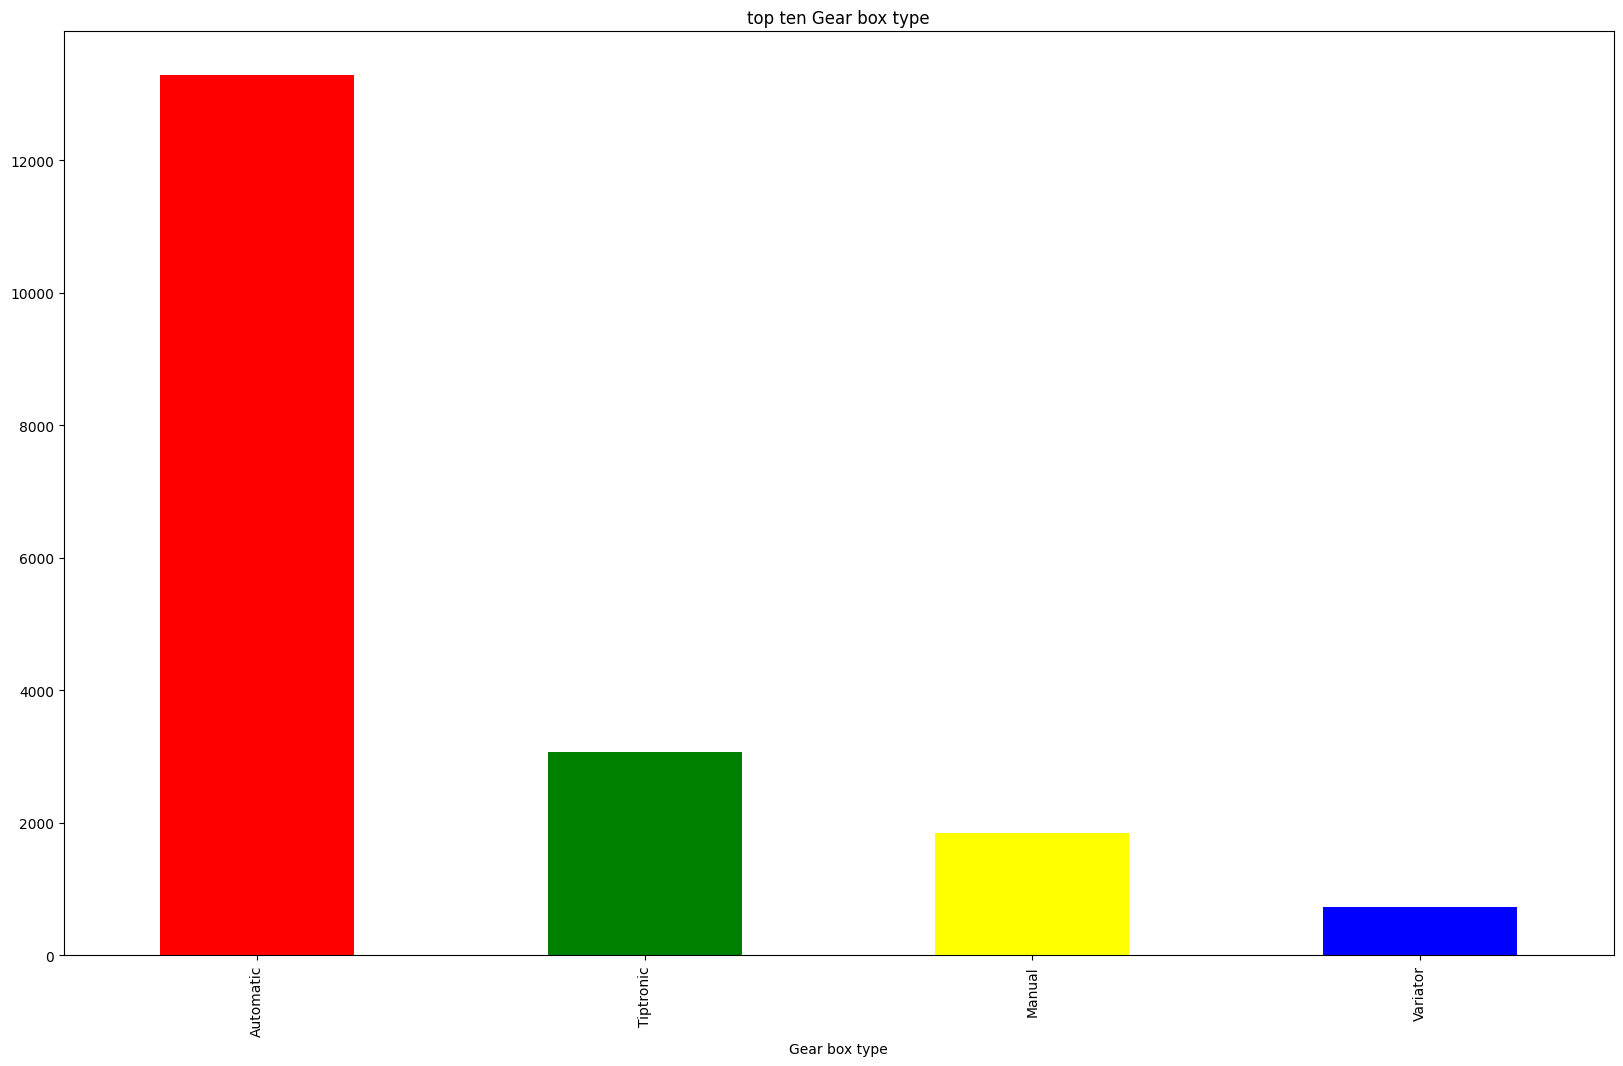

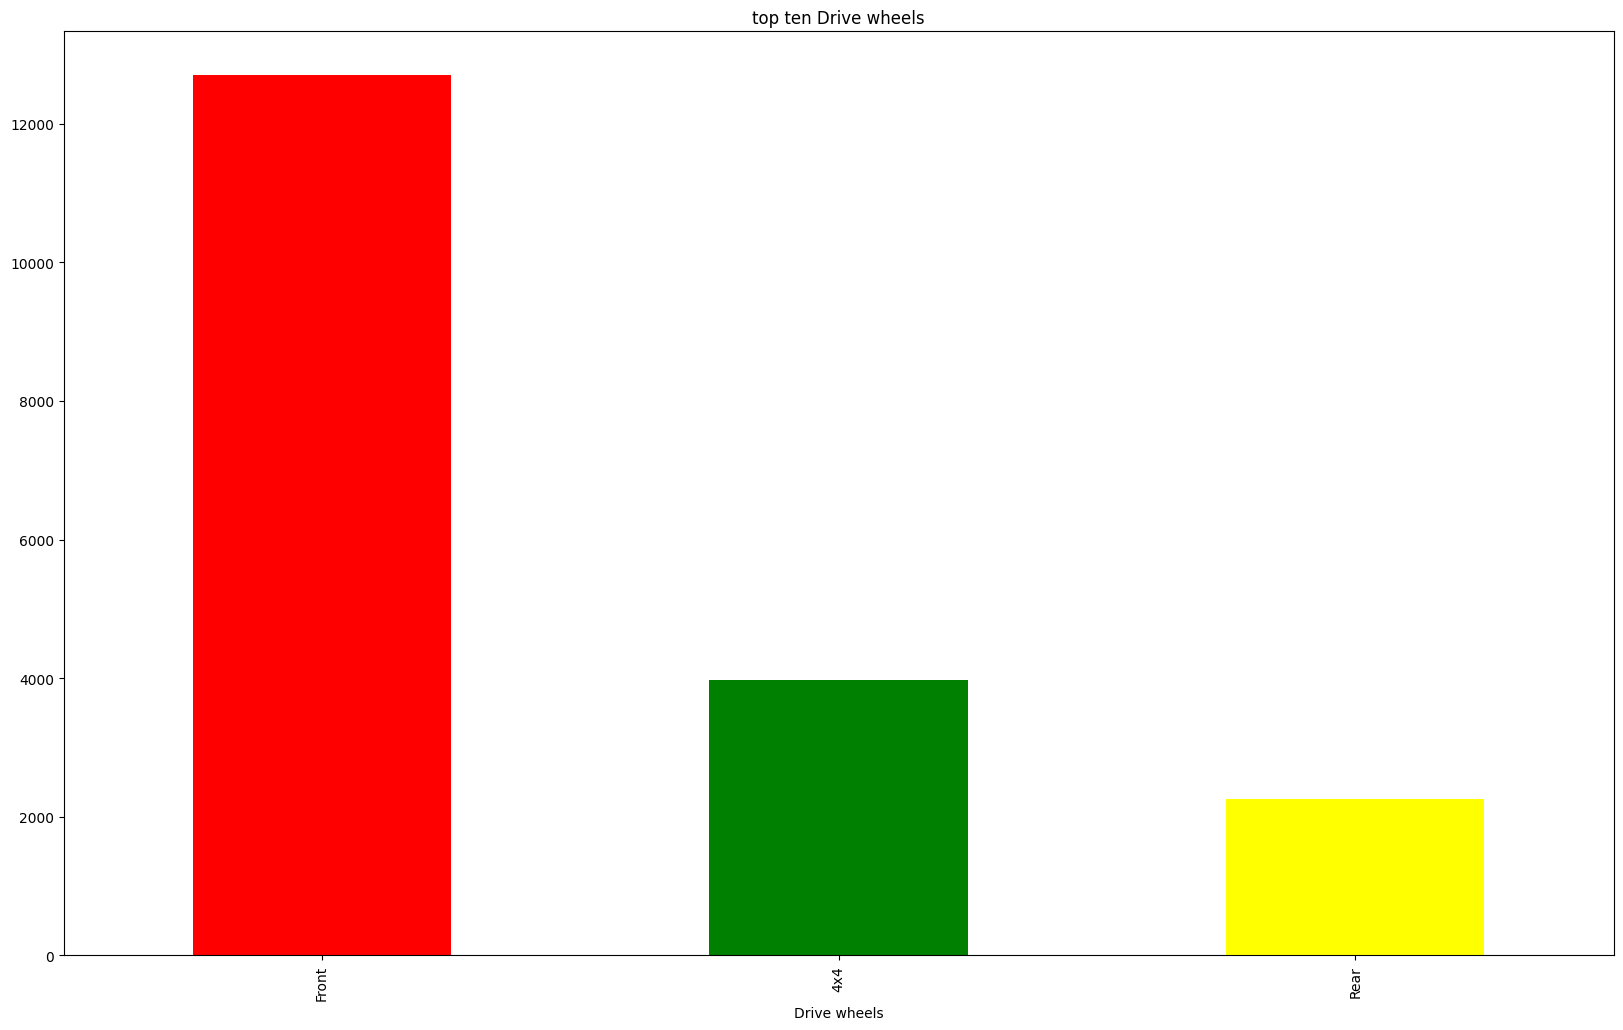

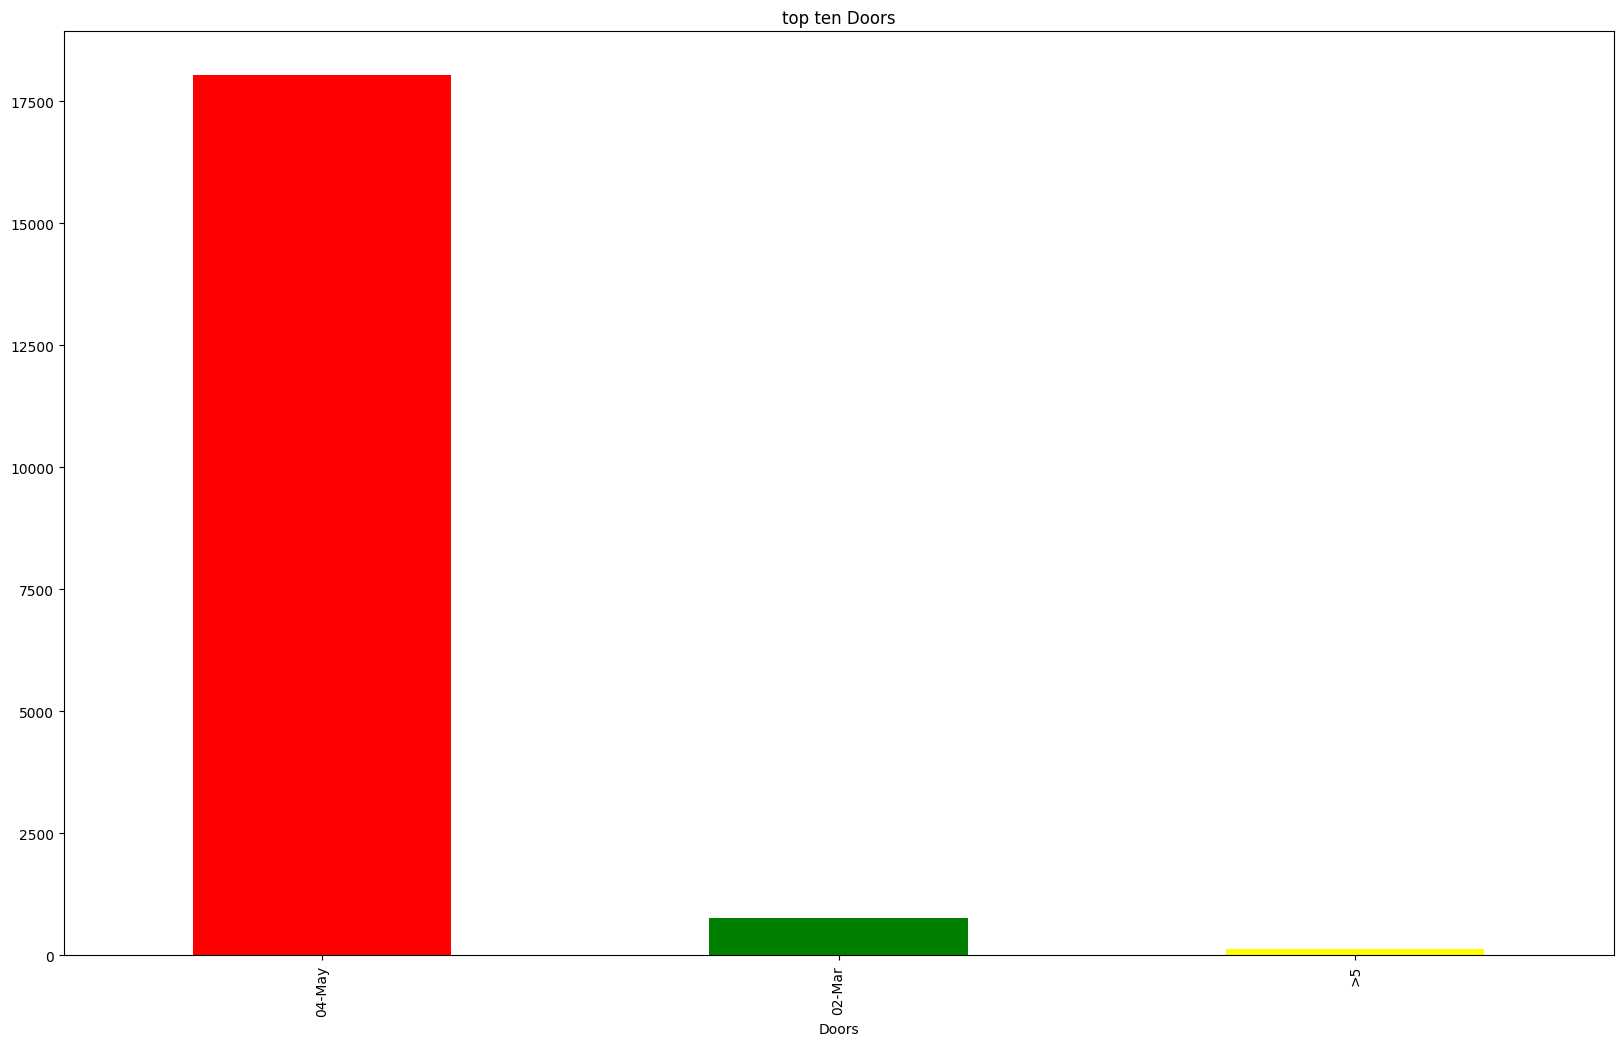

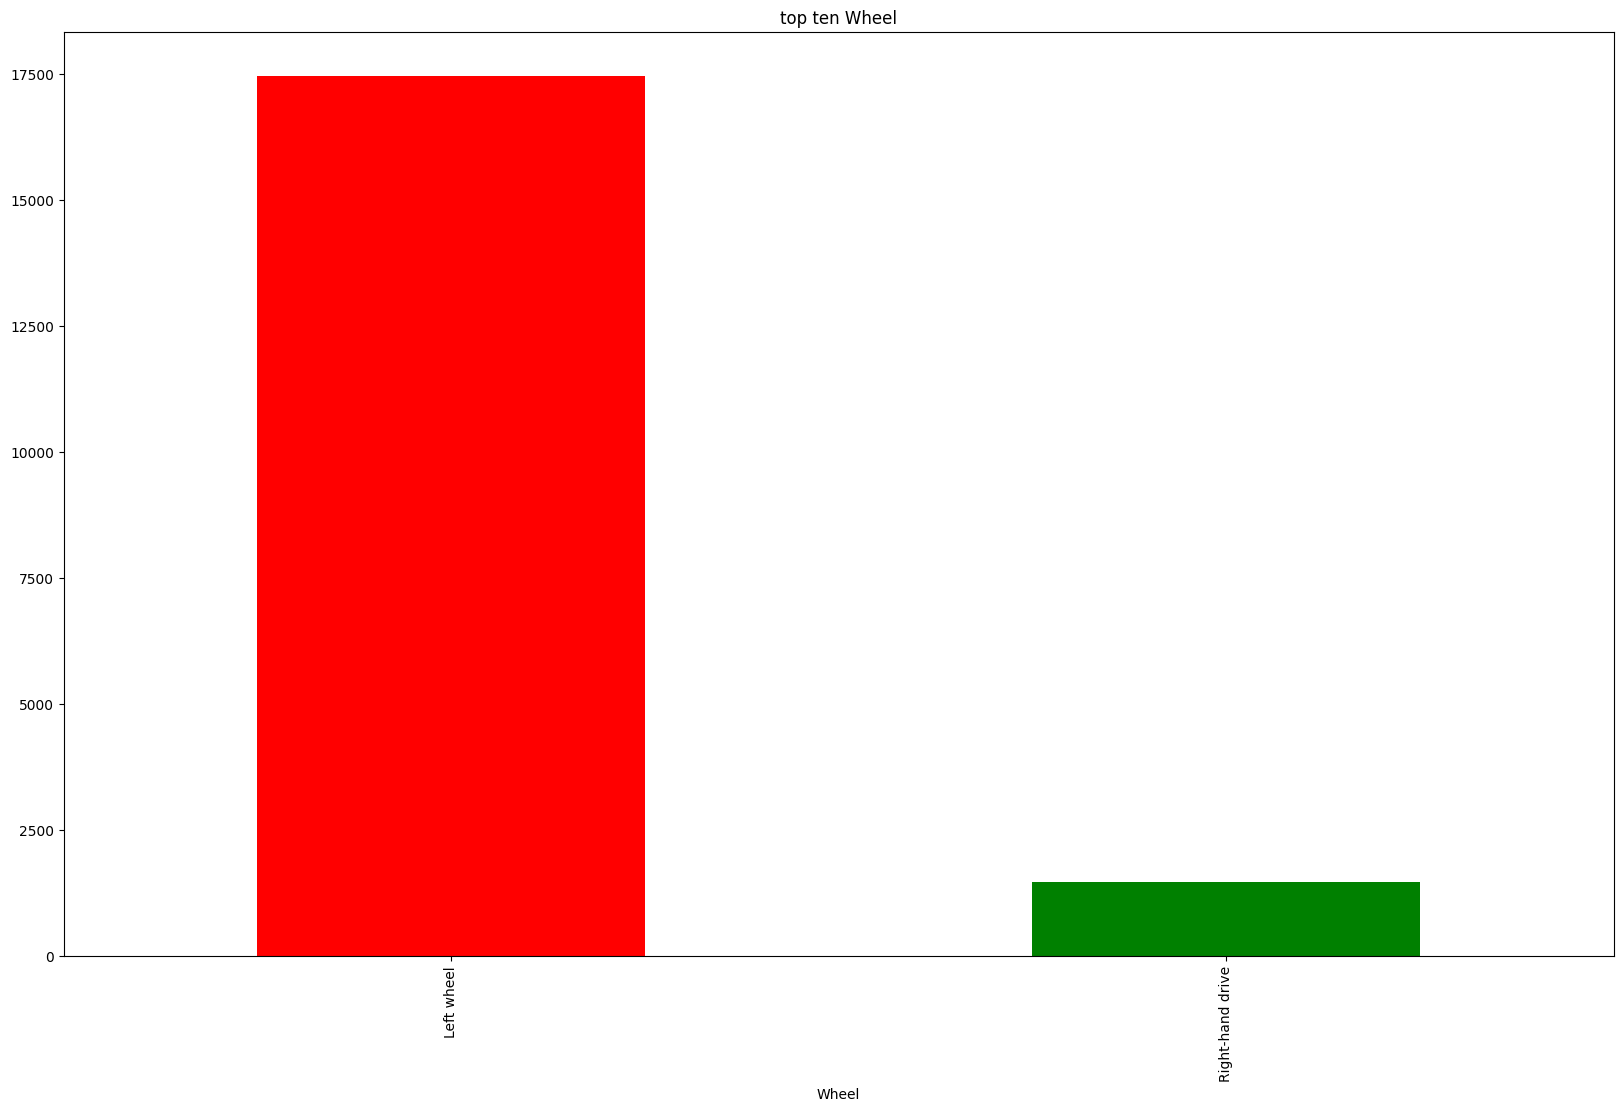

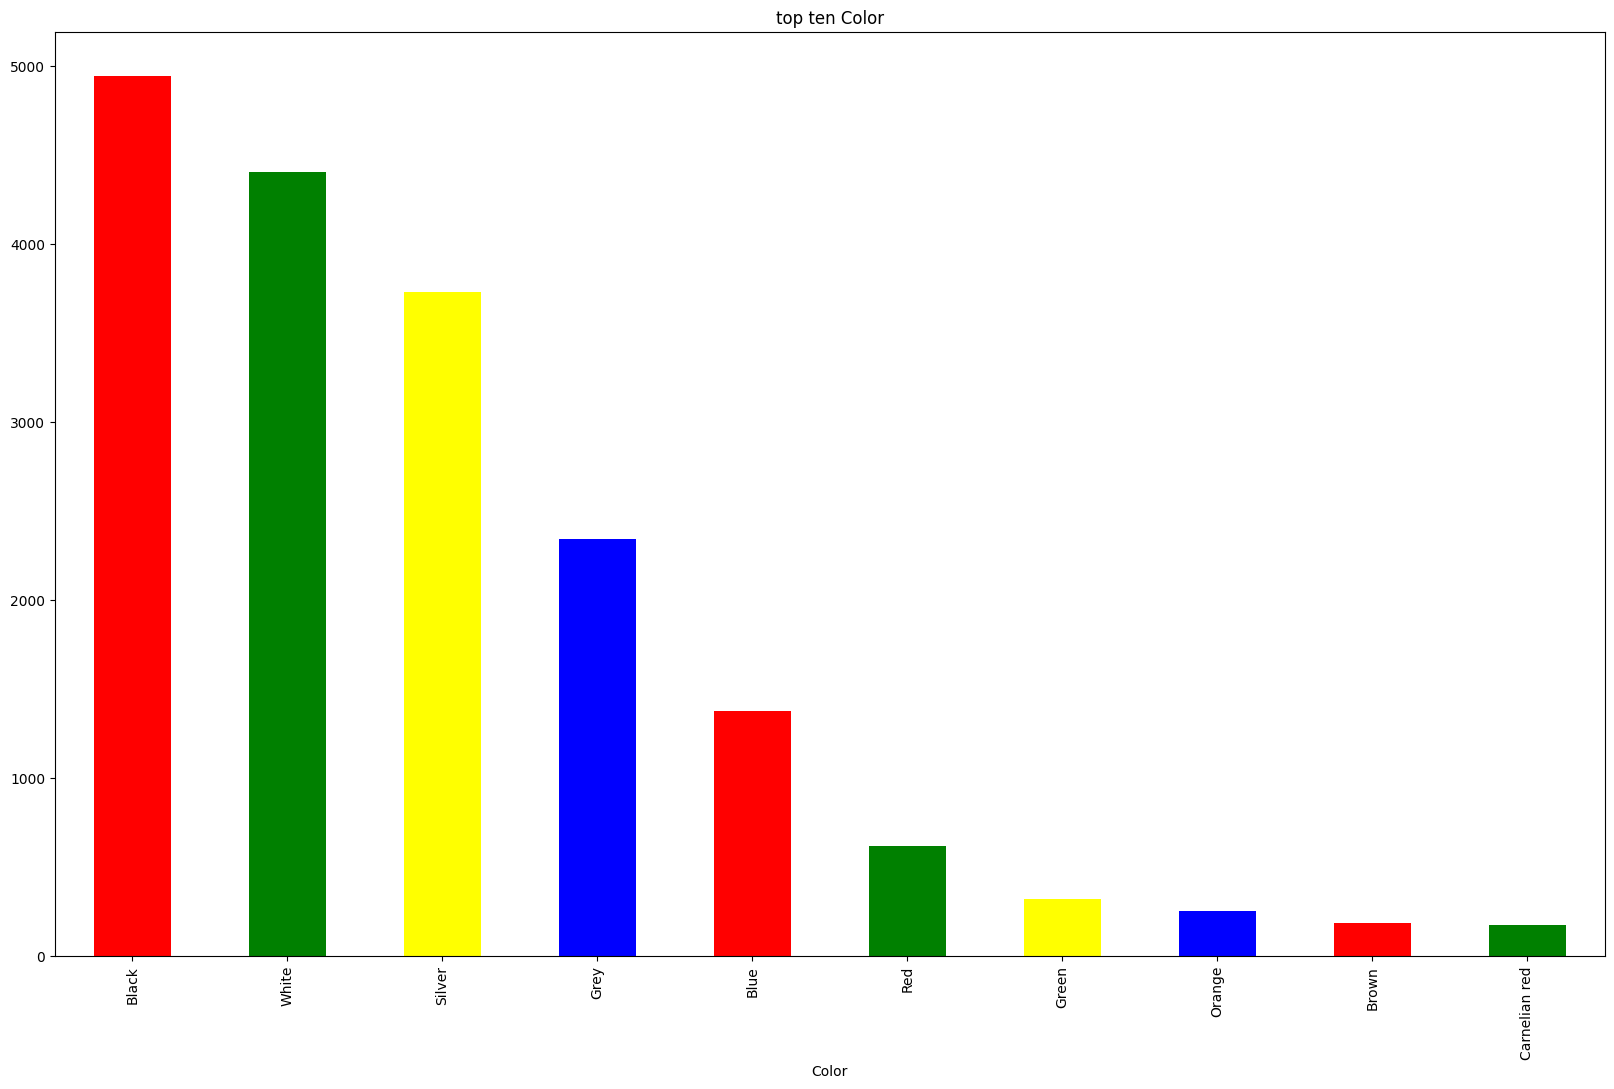

In [26]:
for i in ob:
    plt.figure(figsize=(20,12))
    top=cars[i].value_counts()[:10]
    color=['red','green','yellow','blue']
    top.plot(kind='bar',color=color)
    plt.title('top ten'+' '+i)
    plt.show()

# Preprocessing

In [27]:
import datetime
dtime=datetime.datetime.now()
dtime

datetime.datetime(2024, 9, 10, 11, 58, 39, 571124)

In [28]:
cars['Age']=dtime.year-cars['Prod. year']

In [29]:
cars.drop(['ID','Doors'],axis=1,inplace = True)

In [30]:
cars['Mileage'] =cars['Mileage'].str.replace('km',"")
cars['Mileage'] = cars['Mileage'].astype('Int64')

In [31]:
cars['Levy'] = cars['Levy'].str.replace('-', '0')
cars['Levy'] = cars['Levy'].astype(float)

In [32]:
cars['Engine volume'] = cars['Engine volume'].str.replace('Turbo','')
cars['Engine volume'] = cars['Engine volume'].astype('float64')

In [33]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  float64
 9   Mileage           18924 non-null  Int64  
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Wheel             18924 non-null  object 
 14  Color             18924 non-null  object 
 15  Airbags           18924 non-null  int64  
 16  Age               18924 non-null  int64  
dty

In [34]:
cars.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,10


### OutLier

In [35]:
non_ob = cars.select_dtypes(exclude=object)

In [36]:
for col in non_ob:
    Q1 = non_ob[col].quantile(0.25)
    Q3 = non_ob[col].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((non_ob[col] < lower_bound) | (non_ob[col] > upper_bound)).sum()
    
    total_points = non_ob[col].shape[0]
    
    print(f"Total Outliers in {col}: {outliers} -- {round(100 * (outliers / total_points), 2)}%")

Total Outliers in Price: 1055 -- 5.57%
Total Outliers in Levy: 160 -- 0.85%
Total Outliers in Prod. year: 962 -- 5.08%
Total Outliers in Engine volume: 1358 -- 7.18%
Total Outliers in Mileage: 635 -- 3.36%
Total Outliers in Cylinders: 4765 -- 25.18%
Total Outliers in Airbags: 0 -- 0.0%
Total Outliers in Age: 962 -- 5.08%


In [37]:
if outliers>0:
    cars = cars.loc[(cars[col]<=upper_bound) & (cars[col]>=lower_bound) ]

### Transform Data

In [38]:
obj=cars.select_dtypes(include='object')
non_obj=cars.select_dtypes(exclude='object')

In [39]:
obj

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,No,Petrol,Tiptronic,4x4,Left wheel,Black
2,HONDA,FIT,Hatchback,No,Petrol,Variator,Front,Right-hand drive,Black
3,FORD,Escape,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...
19231,MERCEDES-BENZ,E 350,Sedan,Yes,Diesel,Automatic,Rear,Left wheel,Grey
19233,HYUNDAI,Sonata,Sedan,Yes,Petrol,Tiptronic,Front,Left wheel,Red
19234,HYUNDAI,Tucson,Jeep,Yes,Diesel,Automatic,Front,Left wheel,Grey
19235,CHEVROLET,Captiva,Jeep,Yes,Diesel,Automatic,Front,Left wheel,Black


In [40]:
non_obj

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Age
0,13328,1399.0,2010,3.5,186005,6.0,12,14
1,16621,1018.0,2011,3.0,192000,6.0,8,13
2,8467,0.0,2006,1.3,200000,4.0,2,18
3,3607,862.0,2011,2.5,168966,4.0,0,13
4,11726,446.0,2014,1.3,91901,4.0,4,10
...,...,...,...,...,...,...,...,...
19231,5802,1055.0,2013,3.5,107800,6.0,12,11
19233,15681,831.0,2011,2.4,161600,4.0,8,13
19234,26108,836.0,2010,2.0,116365,4.0,4,14
19235,5331,1288.0,2007,2.0,51258,4.0,4,17


In [41]:
la = LabelEncoder()

In [42]:
for i in range(0,obj.shape[1]):
    obj.iloc[:,i]=la.fit_transform(obj.iloc[:,i])

In [43]:
obj.head()

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,32,1136,4,1,2,0,0,0,12
1,8,586,4,0,5,2,0,0,1
2,21,610,3,0,5,3,1,1,1
3,16,589,4,1,2,0,0,0,14
4,21,610,3,1,5,0,1,0,12


In [44]:
obj=obj.astype('int')

In [45]:
obj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17962 entries, 0 to 19236
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Manufacturer      17962 non-null  int64
 1   Model             17962 non-null  int64
 2   Category          17962 non-null  int64
 3   Leather interior  17962 non-null  int64
 4   Fuel type         17962 non-null  int64
 5   Gear box type     17962 non-null  int64
 6   Drive wheels      17962 non-null  int64
 7   Wheel             17962 non-null  int64
 8   Color             17962 non-null  int64
dtypes: int64(9)
memory usage: 1.4 MB


In [46]:
cars=pd.concat([obj,non_obj],axis=1)

In [47]:
cars

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Age
0,32,1136,4,1,2,0,0,0,12,13328,1399.0,2010,3.5,186005,6.0,12,14
1,8,586,4,0,5,2,0,0,1,16621,1018.0,2011,3.0,192000,6.0,8,13
2,21,610,3,0,5,3,1,1,1,8467,0.0,2006,1.3,200000,4.0,2,18
3,16,589,4,1,2,0,0,0,14,3607,862.0,2011,2.5,168966,4.0,0,13
4,21,610,3,1,5,0,1,0,12,11726,446.0,2014,1.3,91901,4.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,36,530,9,1,1,0,2,0,7,5802,1055.0,2013,3.5,107800,6.0,12,11
19233,23,1213,9,1,5,2,1,0,11,15681,831.0,2011,2.4,161600,4.0,8,13
19234,23,1312,4,1,1,0,1,0,7,26108,836.0,2010,2.0,116365,4.0,4,14
19235,8,396,4,1,1,0,1,0,1,5331,1288.0,2007,2.0,51258,4.0,4,17


In [48]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17962 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      17962 non-null  int64  
 1   Model             17962 non-null  int64  
 2   Category          17962 non-null  int64  
 3   Leather interior  17962 non-null  int64  
 4   Fuel type         17962 non-null  int64  
 5   Gear box type     17962 non-null  int64  
 6   Drive wheels      17962 non-null  int64  
 7   Wheel             17962 non-null  int64  
 8   Color             17962 non-null  int64  
 9   Price             17962 non-null  int64  
 10  Levy              17962 non-null  float64
 11  Prod. year        17962 non-null  int64  
 12  Engine volume     17962 non-null  float64
 13  Mileage           17962 non-null  Int64  
 14  Cylinders         17962 non-null  float64
 15  Airbags           17962 non-null  int64  
 16  Age               17962 non-null  int64  
dty

# Build Model

In [49]:
x=cars.drop(['Price'],axis=1)

In [50]:
y=cars['Price']

In [51]:
x

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Age
0,32,1136,4,1,2,0,0,0,12,1399.0,2010,3.5,186005,6.0,12,14
1,8,586,4,0,5,2,0,0,1,1018.0,2011,3.0,192000,6.0,8,13
2,21,610,3,0,5,3,1,1,1,0.0,2006,1.3,200000,4.0,2,18
3,16,589,4,1,2,0,0,0,14,862.0,2011,2.5,168966,4.0,0,13
4,21,610,3,1,5,0,1,0,12,446.0,2014,1.3,91901,4.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,36,530,9,1,1,0,2,0,7,1055.0,2013,3.5,107800,6.0,12,11
19233,23,1213,9,1,5,2,1,0,11,831.0,2011,2.4,161600,4.0,8,13
19234,23,1312,4,1,1,0,1,0,7,836.0,2010,2.0,116365,4.0,4,14
19235,8,396,4,1,1,0,1,0,1,1288.0,2007,2.0,51258,4.0,4,17


In [52]:
y

0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
19231     5802
19233    15681
19234    26108
19235     5331
19236      470
Name: Price, Length: 17962, dtype: int64

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [54]:
Model_LR=LinearRegression()
Model_RF=RandomForestRegressor(n_estimators=100, max_features= 7)
Model_SVC=SVR()
Model_XGB=XGBRegressor(ax_depth = 7, n_estimators=500, learning_rate =.05)
Model_GBoosting=GradientBoostingRegressor(learning_rate =.07, max_depth =7, verbose=0)
Model_DT=DecisionTreeRegressor()

In [55]:
Algo=['LinearRegression','RandomForestRegressor','SVR','XGBRegressor','GradientBoostingRegressor','DecisionTreeRegressor']
R2=[]
RMSE=[]

In [56]:
def predict(model):
    model.fit(x_train,y_train)
    model.predict(x_test)
    r2=r2_score(y_test,model.predict(x_test))
    rmse=np.sqrt(mean_squared_error(y_test,model.predict(x_test)))
    R2.append(r2)
    RMSE.append(rmse)
    score=model.score(x_test,y_test)
    print(f'score of model is : {score}')
    

In [57]:
predict(Model_LR)
predict(Model_RF)
predict(Model_SVC)
predict(Model_XGB)
predict(Model_GBoosting)
predict(Model_DT)

score of model is : 0.21538755560337397
score of model is : 0.7198119503304252
score of model is : -0.04374447814869198
score of model is : 0.7233787888910785
score of model is : 0.6847084288076899
score of model is : 0.5567822475233561


In [58]:
pd.DataFrame({'Algorithm':Algo,'R2_core':R2,'RMSE':RMSE})

,Algorithm,R2_core,RMSE
0,LinearRegression,0.215388,16306.512772
1,RandomForestRegressor,0.719812,9744.471799
2,SVR,-0.043744,18807.479383
3,XGBRegressor,0.723379,9682.248797
4,GradientBoostingRegressor,0.684708,10336.884873
5,DecisionTreeRegressor,0.556782,12255.811495
